In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress


# Import keys
from config import w_api_key
from config import gkey

# Import citipy module
# Be sure to be in PythonData where this installed to have this work
from citipy import citipy

# Output file
output_data_file = "output_data/cities.csv"

# Set range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# List for holding lat_lngs and cities
coordinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=30)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=30)
coordinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coord in coordinates:
    city = citipy.nearest_city(coord[0], coord[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

26

In [3]:
cities

['bambous virieux',
 'albany',
 'mataura',
 'bay roberts',
 'lavrentiya',
 'vieste',
 'saskylakh',
 'atuona',
 'palabuhanratu',
 'tuktoyaktuk',
 'kapaa',
 'lompoc',
 'coquimbo',
 'thompson',
 'rikitea',
 'brazzaville',
 'komsomolskiy',
 'kushmurun',
 'port alfred',
 'north myrtle beach',
 'hobart',
 'hermanus',
 'padang',
 'vaini',
 'pevek',
 'bengkulu']

In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
farenheit = "units=imperial" #imperial
city = cities[2]


# Build query URL
query_url = url + "appid=" + w_api_key + "&q=" + city + "&units=imperial"

# Hooray!  I'm talking to the data source and my call is working.

In [7]:
# Ok how am I getting information out of the json/results?
city_data_test = requests.get(query_url).json()
city_data_test

{'coord': {'lon': 168.8643, 'lat': -46.1927},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 74.17,
  'feels_like': 74.52,
  'temp_min': 74.17,
  'temp_max': 74.17,
  'pressure': 1004,
  'humidity': 49,
  'sea_level': 1004,
  'grnd_level': 998},
 'visibility': 10000,
 'wind': {'speed': 1.45, 'deg': 357},
 'rain': {'1h': 0.22719999999999999},
 'clouds': {'all': 96},
 'dt': 1612761630,
 'sys': {'country': 'NZ', 'sunrise': 1612720100, 'sunset': 1612771750},
 'timezone': 46800,
 'id': 6201424,
 'name': 'Mataura',
 'cod': 200}

In [8]:
# Set up dataframe to hold data from Open Weather

weather_data = pd.DataFrame({
    "City": cities
})

# Add empty columns to fill
weather_data["Lat"] = ""
weather_data["Long"] = ""
weather_data["Max Temp"] = ""
weather_data["Humidity"] = ""
weather_data["Cloudiness"] = ""
weather_data["Wind Speed"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""

weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,,,,,,,,
1,albany,,,,,,,,
2,mataura,,,,,,,,
3,bay roberts,,,,,,,,
4,lavrentiya,,,,,,,,
5,vieste,,,,,,,,
6,saskylakh,,,,,,,,
7,atuona,,,,,,,,
8,palabuhanratu,,,,,,,,
9,tuktoyaktuk,,,,,,,,


In [9]:
# Set up a for loop to go through the weather_data dataframe
# to look for data for each city
# params = {degrees = farenheit}

base_url = url + "appid=" + w_api_key + "&units=imperial" + "&q=" 

for index, row in weather_data.iterrows():
    
    # Get the city name from the df
    name = row["City"]
    
    # Add city to url
    print(f"Retrieving data for {index}: {name}.")
    response = requests.get(base_url + name).json()
    
#     print(response)
    
    # Extract data
    results = response
#     print(results["coord"]["lat"])
    
    try:
#         print("Proof of entry into try block")
        weather_data.loc[index, "Lat"] = results["coord"]["lat"]
        weather_data.loc[index, "Long"] = results["coord"]["lon"]
        weather_data.loc[index, "Max Temp"] = results["main"]["temp_max"]
        weather_data.loc[index, "Humidity"] = results["main"]["humidity"]
        weather_data.loc[index, "Cloudiness"] = results["clouds"]["all"]
        weather_data.loc[index, "Wind Speed"] = results["wind"]["speed"]
        weather_data.loc[index, "Country"] = results["sys"]["country"]
        weather_data.loc[index, "Date"] = results["dt"]
        
        print(f"Retrieving results for {name}. Loading stats.")
        
    except KeyError:
        print(f"{name} not found.")
        weather_data.loc[index, "Lat"] = np.nan
        pass
    
    time.sleep(1)


Retrieving data for 0: bambous virieux.
Retrieving results for bambous virieux. Loading stats.
Retrieving data for 1: albany.
Retrieving results for albany. Loading stats.
Retrieving data for 2: mataura.
Retrieving results for mataura. Loading stats.
Retrieving data for 3: bay roberts.
Retrieving results for bay roberts. Loading stats.
Retrieving data for 4: lavrentiya.
Retrieving results for lavrentiya. Loading stats.
Retrieving data for 5: vieste.
Retrieving results for vieste. Loading stats.
Retrieving data for 6: saskylakh.
Retrieving results for saskylakh. Loading stats.
Retrieving data for 7: atuona.
Retrieving results for atuona. Loading stats.
Retrieving data for 8: palabuhanratu.
palabuhanratu not found.
Retrieving data for 9: tuktoyaktuk.
Retrieving results for tuktoyaktuk. Loading stats.
Retrieving data for 10: kapaa.
Retrieving results for kapaa. Loading stats.
Retrieving data for 11: lompoc.
Retrieving results for lompoc. Loading stats.
Retrieving data for 12: coquimbo.
Re

In [10]:
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,86,62,40,11.5,MU,1612761728
1,albany,42.6001,-73.9662,19,50,18,8.34,US,1612761209
2,mataura,-46.1927,168.864,74.17,49,96,1.45,NZ,1612761630
3,bay roberts,47.5999,-53.2648,28.99,80,95,9.73,CA,1612761731
4,lavrentiya,65.5833,-171,-10.97,84,27,10.25,RU,1612761448
5,vieste,41.8825,16.175,51.8,82,40,5.75,IT,1612761734
6,saskylakh,71.9167,114.083,-35.14,81,43,9.6,RU,1612761292
7,atuona,-9.8,-139.033,79.41,78,16,19.82,PF,1612761365
8,palabuhanratu,NaN,,,,,,,
9,tuktoyaktuk,69.4541,-133.037,-29.2,68,1,8.05,CA,1612761738


In [13]:
weather_data.dropna(inplace=True)
weather_data.reset_index(drop=True, inplace=True)
weather_data

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,86,62,40,11.5,MU,1612761728
1,albany,42.6001,-73.9662,19,50,18,8.34,US,1612761209
2,mataura,-46.1927,168.864,74.17,49,96,1.45,NZ,1612761630
3,bay roberts,47.5999,-53.2648,28.99,80,95,9.73,CA,1612761731
4,lavrentiya,65.5833,-171,-10.97,84,27,10.25,RU,1612761448
5,vieste,41.8825,16.175,51.8,82,40,5.75,IT,1612761734
6,saskylakh,71.9167,114.083,-35.14,81,43,9.6,RU,1612761292
7,atuona,-9.8,-139.033,79.41,78,16,19.82,PF,1612761365
8,tuktoyaktuk,69.4541,-133.037,-29.2,68,1,8.05,CA,1612761738
9,kapaa,22.0752,-159.319,69.8,60,75,2.75,US,1612761740


In [14]:
# Export weather_data to csv
# This file is a place holder for proof of concept.
# Update with full data set later

weather_data.to_csv("Working_data.csv", index=False)

weather_data_2 = pd.read_csv("Working_data.csv")
weather_data_2

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,86.00,62,40,11.50,MU,1612761728
1,albany,42.6001,-73.9662,19.00,50,18,8.34,US,1612761209
2,mataura,-46.1927,168.8643,74.17,49,96,1.45,NZ,1612761630
3,bay roberts,47.5999,-53.2648,28.99,80,95,9.73,CA,1612761731
4,lavrentiya,65.5833,-171.0000,-10.97,84,27,10.25,RU,1612761448
5,vieste,41.8825,16.1750,51.80,82,40,5.75,IT,1612761734
6,saskylakh,71.9167,114.0833,-35.14,81,43,9.60,RU,1612761292
7,atuona,-9.8000,-139.0333,79.41,78,16,19.82,PF,1612761365
8,tuktoyaktuk,69.4541,-133.0374,-29.20,68,1,8.05,CA,1612761738
9,kapaa,22.0752,-159.3190,69.80,60,75,2.75,US,1612761740


In [15]:
# Make a heck ton of scatter plots

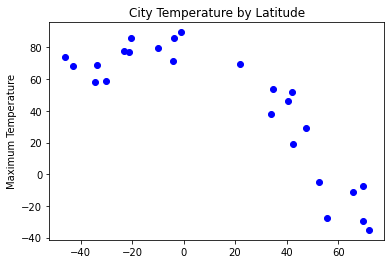

In [17]:
# Temp vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot(x, temp_y, "bo")

plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")

plt.show()

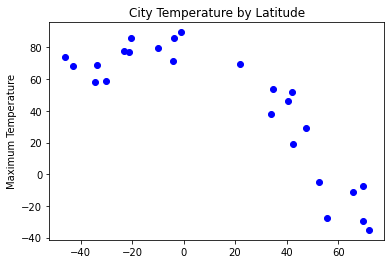

In [18]:
# Temperature vs Latitude
x = weather_data["Lat"]
temp_y = weather_data["Max Temp"]

plt.plot (x, temp_y, "bo")
plt.ylabel("Maximum Temperature")
plt.title("City Temperature by Latitude")
plt.show()

# Why won't my plt.xlabel work????

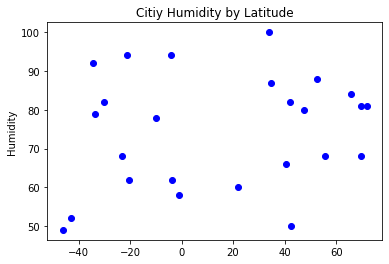

In [19]:
# Humidity vs Latitude
humid_y = weather_data["Humidity"]

plt.plot(x, humid_y, "bo")
plt.ylabel("Humidity")
# plt.xlabel("Latitude")
plt.title("Citiy Humidity by Latitude")
plt.show()

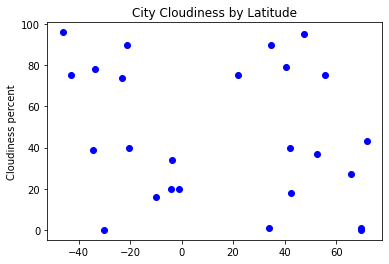

In [20]:
# Cloudiness vs Latitude
cloud_y = weather_data["Cloudiness"]

plt.plot(x, cloud_y, "bo")
plt.ylabel("Cloudiness percent")
plt.title("City Cloudiness by Latitude")
plt.show()

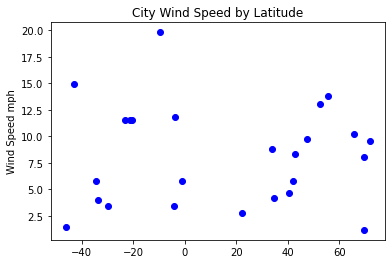

In [21]:
# Wind Speed by Latitude
wind_y = weather_data["Wind Speed"]

plt.plot(x, wind_y, "bo")
plt.ylabel("Wind Speed mph")
plt.title("City Wind Speed by Latitude")
plt.show()

In [22]:
# Separate df by hemispheres
northern_weather = weather_data_2.loc[weather_data["Lat"] >= 0]
northern_weather

southern_weather = weather_data_2.loc[weather_data["Lat"] <= 0]
southern_weather

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bambous virieux,-20.3428,57.7575,86.00,62,40,11.50,MU,1612761728
2,mataura,-46.1927,168.8643,74.17,49,96,1.45,NZ,1612761630
7,atuona,-9.8000,-139.0333,79.41,78,16,19.82,PF,1612761365
11,coquimbo,-29.9533,-71.3436,59.00,82,0,3.44,CL,1612761225
13,rikitea,-23.1203,-134.9692,77.59,68,74,11.54,PF,1612761221
14,brazzaville,-4.2658,15.2832,71.60,94,20,3.44,CG,1612761745
17,port alfred,-33.5906,26.8910,69.01,79,78,4.00,ZA,1612761748
19,hobart,-42.8794,147.3294,68.00,52,75,14.97,AU,1612761114
20,hermanus,-34.4187,19.2345,57.99,92,39,5.79,ZA,1612761365
21,padang,-0.9492,100.3543,89.60,58,20,5.75,ID,1612761452


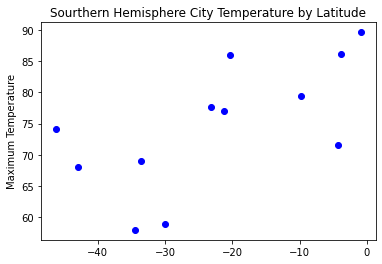

In [23]:
# Let's start with the Northern Hemisphere (because sample set is mostly northern)

# Northern Temp vs Latitude
south_x = southern_weather["Lat"]
south_temp = southern_weather["Max Temp"]

plt.plot (south_x, south_temp, "bo")
plt.ylabel("Maximum Temperature")
# plt.xlabel("Latitude")
plt.title("Sourthern Hemisphere City Temperature by Latitude")
plt.show()

# Calculate the regression


The correlation between latitude and temperature in the Southern Hemisphere is 0.64


Text(-40, 285, 'y = 0.42x + 84.03')

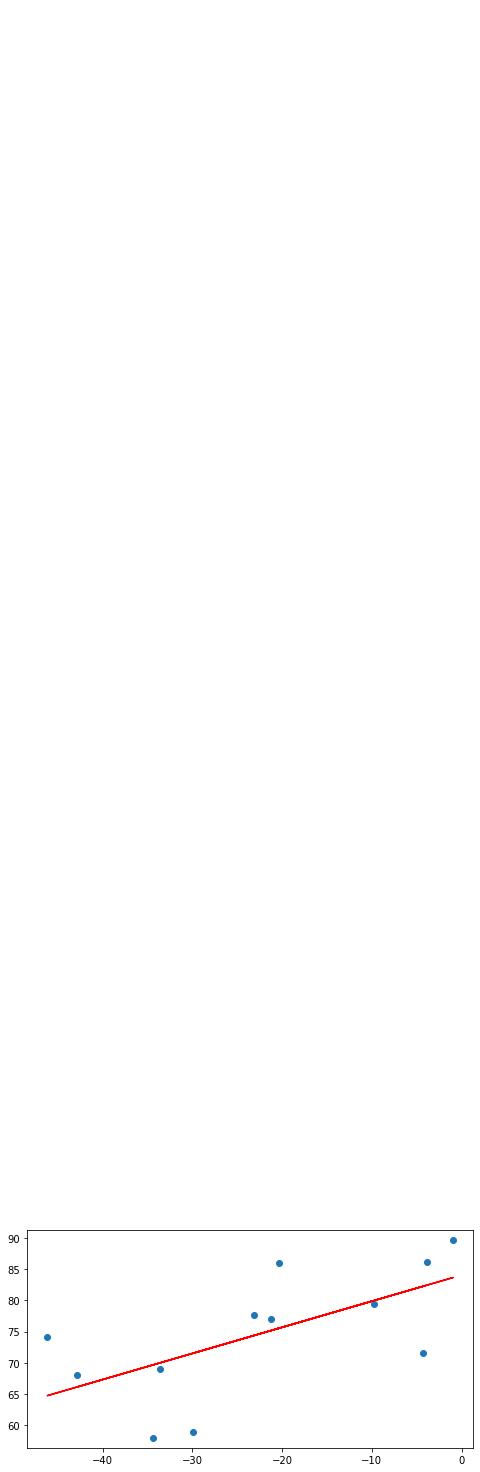

In [24]:
correlation = st.pearsonr(south_x, south_temp)
print(f"The correlation between latitude and temperature in the Southern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_x, south_temp)
regress_values = south_x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(8, 4))
plt.scatter(south_x, south_temp)
plt.plot(south_x, regress_values, "r-")
plt.annotate(line_eq,(-40,285),fontsize=15,color="green")

In [25]:
# Can't run this until I have a larger data set


correlation = st.pearsonr(north_x, north_temp)
print(f"The correlation between latitude and temperature in the Northern Hemisphere is {round(correlation[0],2)}")

# Calculate the line of best fit and plot on the graph
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_x, north_temp)
regress_values = north_x * slope + intercept
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(north_x, north_temp)
plt.plot(north_x, regress_values, "r-")
plt.annotate(f'Correlation:  {round(rvalue, 2)}', (-2,-15), fontsize=14, color='#1e4bae')
plt.annotate(f'Linear Reg:  {line_eq}', (-2,-30), fontsize=14, color='#1e4bae')

plt.show()

NameError: name 'north_x' is not defined